In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

from main import *

## Validation of MC Simulation

### The distribution of the points a landlord gets

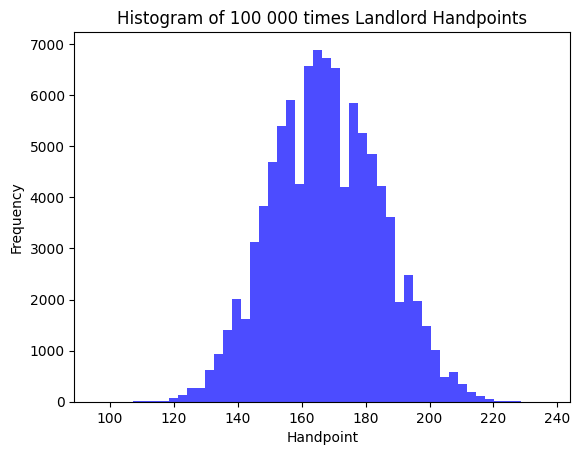

Mean = 167.79676
Standard Deviation = 16.972914702619583


In [2]:
landlord_handpoints = []
for i in range(100000):
    players = [Player() for _ in range(3)]
    set_up_new_game(players)
    for player in players:
        if player.character == LANDLORD:
            landlord_handpoints.append(player.hand_points)

# Create a histogram
# It should be between 79 and 258
plt.hist(landlord_handpoints, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of 100 000 times Landlord Handpoints')
plt.xlabel('Handpoint')
plt.ylabel('Frequency')

plt.show()

print(f"Mean = {np.mean(landlord_handpoints)}\nStandard Deviation = {np.std(landlord_handpoints)}")

### Landlord Win Rates for different playing strength

In [3]:
with open("data/DouDiZhu_results_ORIGINAL_RULE.csv", "r", encoding="utf-8") as ddz_csv:
    reader = csv.DictReader(ddz_csv)
    ddz_data = list(reader)

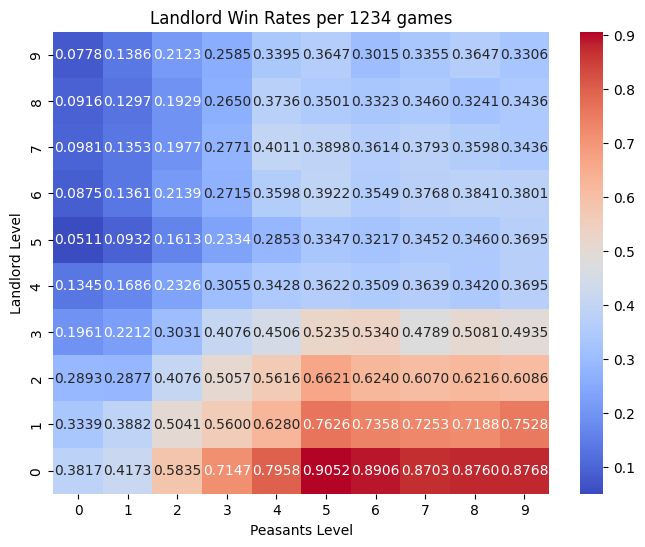

In [4]:
# Create a DataFrame from the data
df = pd.DataFrame(ddz_data)
df['landlord_lv'] = df['landlord_lv'].astype(int)
df['peasants_lv'] = df['peasants_lv'].astype(int)
df['win_rate_landlord'] = df['win_rate_landlord'].astype(float)

# Pivot the DataFrame to create a table
table = df.pivot(index='landlord_lv', columns='peasants_lv', values='win_rate_landlord')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(table.iloc[::-1], annot=True, cmap='coolwarm', fmt='.4f', cbar=True)

# Set labels and title
plt.xlabel('Peasants Level')
plt.ylabel('Landlord Level')
plt.title('Landlord Win Rates per 1234 games')

# Show the plot
plt.show()


## Experiment of MC Simulation

### Special Rule 1 - 2 with 1
Players now can play two with one as a move. e.g. [7, 7, 8], [3, 3, 10]

In [5]:
with open("data/DouDiZhu_results_SPECIAL_RULE1.csv", "r", encoding="utf-8") as ddz_csv:
    reader = csv.DictReader(ddz_csv)
    ddz_sp_data = list(reader)

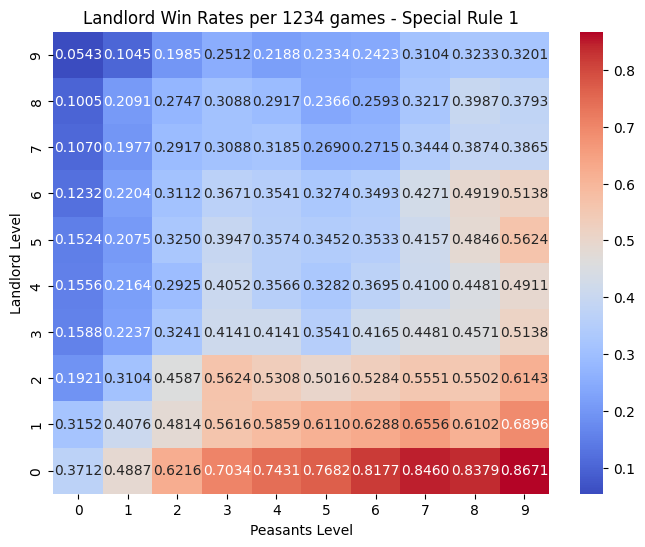

In [6]:
# Create a DataFrame from the data
df = pd.DataFrame(ddz_sp_data)
df['landlord_lv'] = df['landlord_lv'].astype(int)
df['peasants_lv'] = df['peasants_lv'].astype(int)
df['win_rate_landlord'] = df['win_rate_landlord'].astype(float)

# Pivot the DataFrame to create a table
table = df.pivot(index='landlord_lv', columns='peasants_lv', values='win_rate_landlord')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(table.iloc[::-1], annot=True, cmap='coolwarm', fmt='.4f', cbar=True)

# Set labels and title
plt.xlabel('Peasants Level')
plt.ylabel('Landlord Level')
plt.title('Landlord Win Rates per 1234 games - Special Rule 1')

# Show the plot
plt.show()

Independent samples t-test:

- Null Hypothesis (H0): The win rates are equal for both rules.
- Alternative Hypothesis (H1): The win rates are not equal for both rules.

In [7]:
win_rate_rule0_2_4 = 0.5373
win_rate_rule1_2_4 = 0.5308
sample_size = 1234

# Calculate standard deviations
std_dev_rule1 = (win_rate_rule0_2_4 * (1 - win_rate_rule0_2_4) / sample_size) ** 0.5
std_dev_rule2 = (win_rate_rule1_2_4 * (1 - win_rate_rule1_2_4) / sample_size) ** 0.5

# Calculate the t-statistic
t_statistic = (win_rate_rule0_2_4 - win_rate_rule1_2_4) / ((std_dev_rule1**2/sample_size) + (std_dev_rule2**2/sample_size))**0.5

# Calculate degrees of freedom
degrees_of_freedom = 2 * sample_size - 2

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Print results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 11.370043289279362
P-value: 0.0


p-value < 0.05, reject H0. There is a significant difference between two rules

### Special Rule 2 - 2 pairs with 1
Players now can play two pairs with one as a move. e.g. [7, 7, 8, 9, 9], [3, 3, 4, 4, 10]

In [8]:
with open("data/DouDiZhu_results_SPECIAL_RULE2.csv", "r", encoding="utf-8") as ddz_csv:
    reader = csv.DictReader(ddz_csv)
    ddz_sp_data = list(reader)

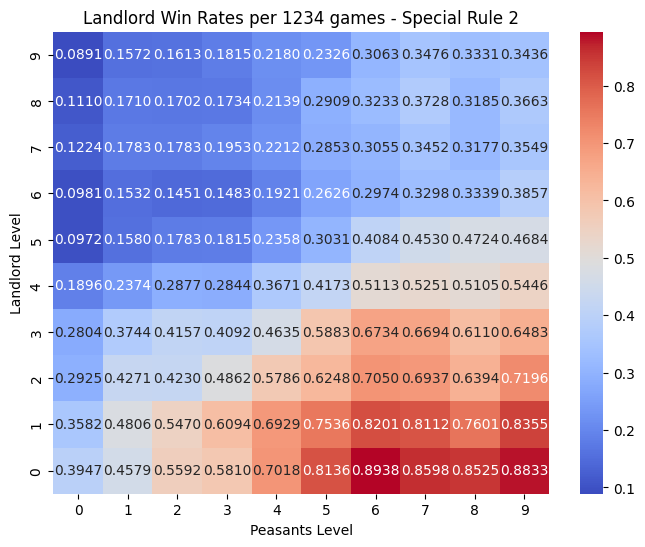

In [9]:
# Create a DataFrame from the data
df = pd.DataFrame(ddz_sp_data)
df['landlord_lv'] = df['landlord_lv'].astype(int)
df['peasants_lv'] = df['peasants_lv'].astype(int)
df['win_rate_landlord'] = df['win_rate_landlord'].astype(float)

# Pivot the DataFrame to create a table
table = df.pivot(index='landlord_lv', columns='peasants_lv', values='win_rate_landlord')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(table.iloc[::-1], annot=True, cmap='coolwarm', fmt='.4f', cbar=True)

# Set labels and title
plt.xlabel('Peasants Level')
plt.ylabel('Landlord Level')
plt.title('Landlord Win Rates per 1234 games - Special Rule 2')

# Show the plot
plt.show()

Independent samples t-test:

- Null Hypothesis (H0): The win rates are equal for both rules.
- Alternative Hypothesis (H1): The win rates are not equal for both rules.

In [10]:
win_rate_rule0_2_4 = 0.5373
win_rate_rule2_2_4 = 0.5786
sample_size = 1234

# Calculate standard deviations
std_dev_rule1 = (win_rate_rule0_2_4 * (1 - win_rate_rule0_2_4) / sample_size) ** 0.5
std_dev_rule2 = (win_rate_rule2_2_4 * (1 - win_rate_rule2_2_4) / sample_size) ** 0.5

# Calculate the t-statistic
t_statistic = (win_rate_rule0_2_4 - win_rate_rule2_2_4) / ((std_dev_rule1**2/sample_size) + (std_dev_rule2**2/sample_size))**0.5

# Calculate degrees of freedom
degrees_of_freedom = 2 * sample_size - 2

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Print results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: -72.62608422489006
P-value: 0.0


p-value < 0.05, reject H0. There is a significant difference between two rules

### Special Rule 3 - Landlord can play an additional move before game starts
The landlord plays a move first, and then starts to play the original game

In [11]:
with open("data/DouDiZhu_results_SPECIAL_RULE3.csv", "r", encoding="utf-8") as ddz_csv:
    reader = csv.DictReader(ddz_csv)
    ddz_sp_data = list(reader)

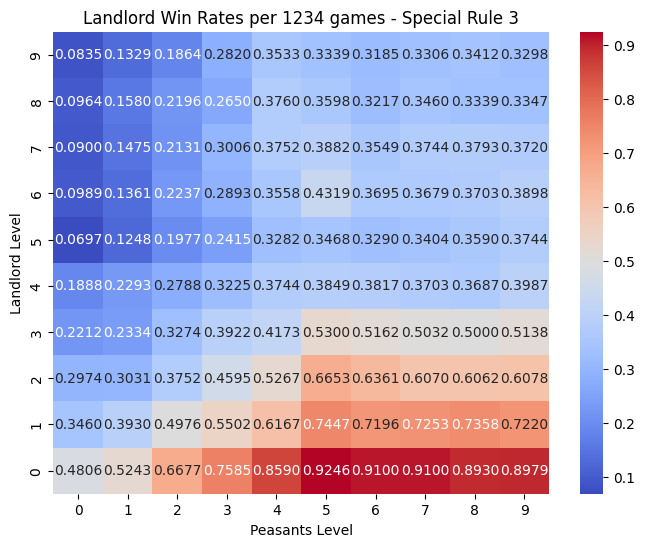

In [12]:
# Create a DataFrame from the data
df = pd.DataFrame(ddz_sp_data)
df['landlord_lv'] = df['landlord_lv'].astype(int)
df['peasants_lv'] = df['peasants_lv'].astype(int)
df['win_rate_landlord'] = df['win_rate_landlord'].astype(float)

# Pivot the DataFrame to create a table
table = df.pivot(index='landlord_lv', columns='peasants_lv', values='win_rate_landlord')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(table.iloc[::-1], annot=True, cmap='coolwarm', fmt='.4f', cbar=True)

# Set labels and title
plt.xlabel('Peasants Level')
plt.ylabel('Landlord Level')
plt.title('Landlord Win Rates per 1234 games - Special Rule 3')

# Show the plot
plt.show()

Independent samples t-test:

- Null Hypothesis (H0): The win rates are equal for both rules.
- Alternative Hypothesis (H1): The win rates are not equal for both rules.

In [13]:
win_rate_rule0_2_4 = 0.5373
win_rate_rule3_2_4 = 0.5267
sample_size = 1234

# Calculate standard deviations
std_dev_rule1 = (win_rate_rule0_2_4 * (1 - win_rate_rule0_2_4) / sample_size) ** 0.5
std_dev_rule2 = (win_rate_rule3_2_4 * (1 - win_rate_rule3_2_4) / sample_size) ** 0.5

# Calculate the t-statistic
t_statistic = (win_rate_rule0_2_4 - win_rate_rule3_2_4) / ((std_dev_rule1**2/sample_size) + (std_dev_rule2**2/sample_size))**0.5

# Calculate degrees of freedom
degrees_of_freedom = 2 * sample_size - 2

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Print results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 18.537526498482393
P-value: 0.0


p-value < 0.05, reject H0. There is a significant difference between two rules